In [1]:
import pandas as pd
import numpy as np
from Class_Network import *
import matplotlib.pylab as plt

In [62]:
# 5 Classes in 8-Dimensional Space
np.random.seed(15)
noise = 0.1
InputClasses = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
OutputClasses = np.array([[1,0,0,0,0],
                          [0,1,0,0,0],
                          [0,0,1,0,0],
                          [0,0,0,1,0],
                          [0,0,0,0,1]], dtype=float)
n_input = np.shape(InputClasses)[1]
n_output = np.shape(OutputClasses)[1]
n_classes = np.shape(InputClasses)[0]

# Create a training dataset
n_samples = 100
training_output = []
training_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    training_input.append(x)
    training_output.append(t)

# Create a test dataset
n_samples = 100
test_output = []
test_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    test_input.append(x)
    test_output.append(t)

train = [np.array(training_input), np.array(training_output)]
test = [np.array(test_input), np.array(test_output)]

In [63]:
net = Network([n_input, 6, n_output], type='classifier', prior_dist_weight = ['gaussian','gaussian'], prior_dist_bias = ['gaussian', 'gaussian','gaussian'])

In [64]:
# Evaluate it before training
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Cross Entropy = 3.876276015482568
     Accuracy = 12.0%


In [65]:
net.Learn(train[0], train[1], epochs=100, lrate=0.1, times = 100, threshold = 1, bootstrap = False, progress=True)

In [74]:
layer = 1
print(net.lyr[layer].bias_vector.mu)
print(net.lyr[layer].bias_vector.sigma)
print(net.weight_matrix[layer - 1].mu)
print(net.weight_matrix[layer - 1].sigma)

[[ 0.83114468  0.98354519 -0.91808296  0.07238599  0.67472814 -0.4647436 ]]
[[1.57693433 1.48666143 1.52795518 1.78109057 1.64992888 1.7209116 ]]
[[-0.06603741 -0.9762695  -0.75166824  0.99899238 -0.83326193  0.13121561]
 [-0.10626292  0.21078242  0.19633394 -0.21353558  0.98808716  0.7731277 ]
 [-0.9191998  -0.3883424   0.01565005 -0.77286706  0.5109471  -0.46208819]
 [ 0.4360465   0.16317722  0.42234268  0.56553996  0.15783595 -0.85356061]
 [-0.27826778  0.61232261  0.50795689  0.69508303  0.14763658  0.02153097]
 [-0.93359965  0.31460899 -0.39179542 -0.18194947  0.61892684 -0.28944032]
 [-0.80648404 -0.294562   -0.26833431  0.03199625  0.8636983   0.92361829]
 [-0.03824944 -0.73779896  0.60944005  0.16577166  0.17991599 -0.64923873]]
[[3.88916093 3.76521334 3.81640256 3.75924831 3.79942209 3.8875077 ]
 [3.88826978 3.88400624 3.8847634  3.88385584 3.76212937 3.81211322]
 [3.77955095 3.87028731 3.88969006 3.81216607 3.85601695 3.86217661]
 [3.86520337 3.88629732 3.86672475 3.84838904 

In [67]:
net.weight_matrix[0].mu

array([[-0.06603741, -0.9762695 , -0.75166824,  0.99899238, -0.83326193,
         0.13121561],
       [-0.10626292,  0.21078242,  0.19633394, -0.21353558,  0.98808716,
         0.7731277 ],
       [-0.9191998 , -0.3883424 ,  0.01565005, -0.77286706,  0.5109471 ,
        -0.46208819],
       [ 0.4360465 ,  0.16317722,  0.42234268,  0.56553996,  0.15783595,
        -0.85356061],
       [-0.27826778,  0.61232261,  0.50795689,  0.69508303,  0.14763658,
         0.02153097],
       [-0.93359965,  0.31460899, -0.39179542, -0.18194947,  0.61892684,
        -0.28944032],
       [-0.80648404, -0.294562  , -0.26833431,  0.03199625,  0.8636983 ,
         0.92361829],
       [-0.03824944, -0.73779896,  0.60944005,  0.16577166,  0.17991599,
        -0.64923873]])

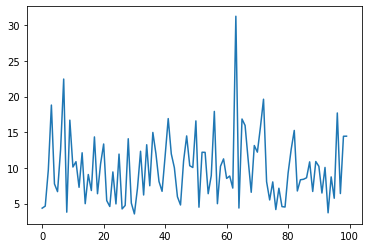

In [68]:
plt.plot(net.cost_history);

In [69]:
print('Training Set')
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Training Set
Cross Entropy = 3.8762760154825724
     Accuracy = 12.0%


In [70]:
print('Test Set')
CE = net.Evaluate(test[0], test[1])
accuracy = net.ClassificationAccuracy(test[0], test[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Test Set
Cross Entropy = 3.728911009229299
     Accuracy = 15.000000000000002%
